In [1]:
import pandas as pd
import seaborn as sns

In [2]:
data= pd.read_csv('IMDB Dataset.csv')
data=data[:100]
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data['sentiment'].value_counts()

sentiment
negative    58
positive    42
Name: count, dtype: int64

In [4]:
test= data

<Axes: xlabel='sentiment', ylabel='count'>

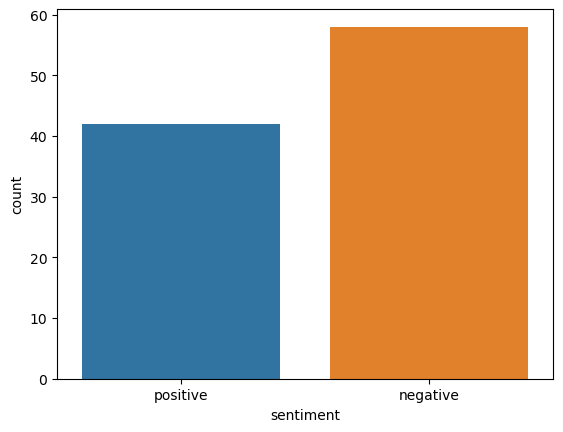

In [5]:
sns.countplot(x='sentiment',data=test)

In [6]:
pos_review=list(test[test['sentiment']=='positive']['review'])
neg_review=list(test[test['sentiment']=='negative']['review'])

In [7]:
!pip install wordcloud

'pip' is not recognized as an internal or external command,
operable program or batch file.


In [8]:
from wordcloud import WordCloud,STOPWORDS
from matplotlib import pyplot as plt

In [9]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

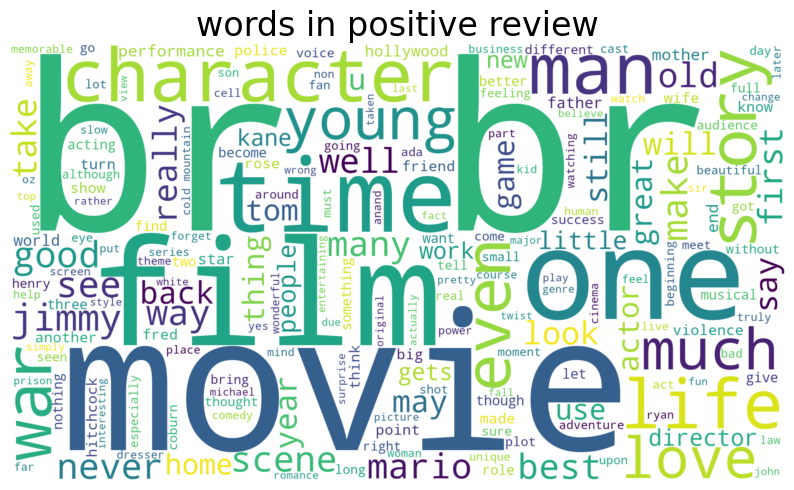

In [10]:
create_cloud(' '.join(pos_review).lower(),'words in positive review')

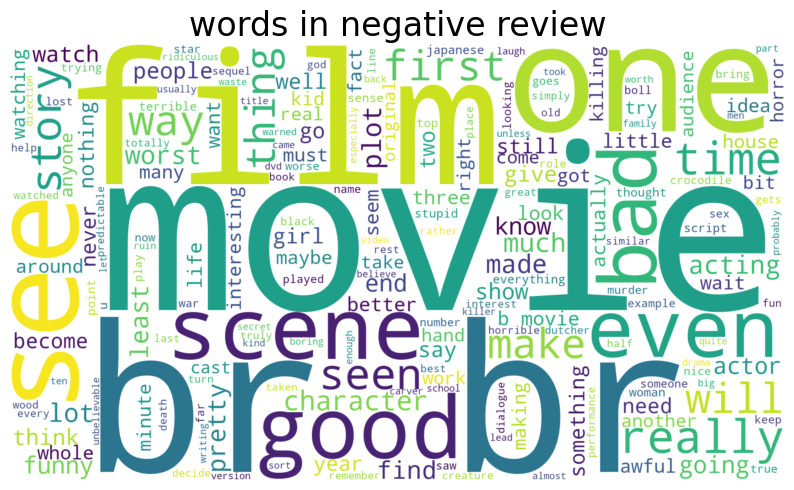

In [11]:
create_cloud(' '.join(neg_review).lower(),'words in negative review')

In [12]:
def text_processing(data):
    from bs4 import BeautifulSoup
    import re
    def decontracted(phrase):
        phrase= re.sub(r'<br /><br />',' ',phrase)
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)
    from tqdm import tqdm
    preprocessed_reviews = []

    for sentance in tqdm(data['review'].values):
        sentance = re.sub(r"http\S+", "", sentance)
        sentance = BeautifulSoup(sentance, 'lxml').get_text()
        sentance = decontracted(sentance)
        sentance = re.sub("\S*\d\S*", "", sentance).strip()
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
         list1=[]
    for words in sentence.split():
        list1.append(porter.stem(words))

        list2.append(' '.join(list1))
    return(list2)

In [13]:
from nltk.stem import PorterStemmer

porter = PorterStemmer()
porter.stem('ignore')

'ignor'

In [14]:
porter.stem("won't")

"won't"

In [15]:
import nltk
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asabi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
test2=pd.read_csv('IMDB Dataset.csv')

In [17]:
X=test2.iloc[:,0:1].values
X.shape

(50000, 1)

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
X=cv.fit_transform(test2['review']).toarray()

In [19]:
 X.shape

(50000, 1000)

In [20]:
y=test2.iloc[:,-1].values
y.shape

(50000,)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=1000)
X=cv.fit_transform(df['review']).toarray()

NameError: name 'df' is not defined

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(10000,)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train_scl, y_train)

RandomForestClassifier()

In [ ]:
#Accuracy of the model on training and testing data
 

In [ ]:
print("Training Accuracy :", model_rf.score(X_train_scl, y_train))
print("Testing Accuracy :", model_rf.score(X_test_scl, y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8324


In [ ]:
X_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Data Processing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2))
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'lower'